# Project: TMDB Movies Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this report, we will analyze data for IMDB movies which comes from Kaggle competition. To understand the relationship between a few characteristics and revenue for movies, we will go through a few steps to clean data, do exploratory data analysis, and visualize data. 
>
> I've a few questions regarding the dataset.
>
>**What's the distribution of most important columns?**
>
>**Which genres are most popular from year over year?**
>
>**Which properties are associated with movies with high revenue?**


> Note that we've selected data from The Movie Database and it's in csv file under the same directory as this jupyter notebook. 

In [24]:
# Import important packages for following analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, I will load in the data, check for cleanliness, and then trim and clean my dataset for analysis. 

### General Properties

In [25]:
# Load the dataset to see first a few rows
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


After importing the dataset into a dataset, we are able to view the first few rows. 

In [26]:
# Get the shape of this datasetb
df.shape

(10866, 21)

In this dataset, there are 10866 rows and 21 columns. 

In [27]:
# Show the columns in this dataset
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [28]:
# Check if any missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

The columns include several import characteristics for the movies. Like popularity, budget, genres, vote_count, vote_average, etc. After inspecting total non-null values in each row, I found 9 columns have missing values. 

In [29]:
# Overview of column data distributions
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Looking into details of columns, most of the movies' runtime are less than 111 mins. Most of the movies were produced between 1995 and 2015. We can definitely see outliers for some columns, like 0 min for runtime.


### Data Cleaning (Replace this with more specific notes!)

In [30]:
# Remove movies with runtime as 0 
df = df[df.runtime != 0]
df.shape

(10835, 21)

In [31]:
# Drop columns that we are not interested in
df.drop(['cast','homepage','tagline','overview','production_companies','imdb_id','director','keywords'],axis=1,inplace=True)

In [32]:
# Delete movies whose genres is null
df.dropna(inplace=True)

In [33]:
# Check if there's any duplicated rows
sum(df.duplicated())

1

In [34]:
# Delete duplicated rows
df.drop_duplicates(inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (What's the distribution of most important columns?)

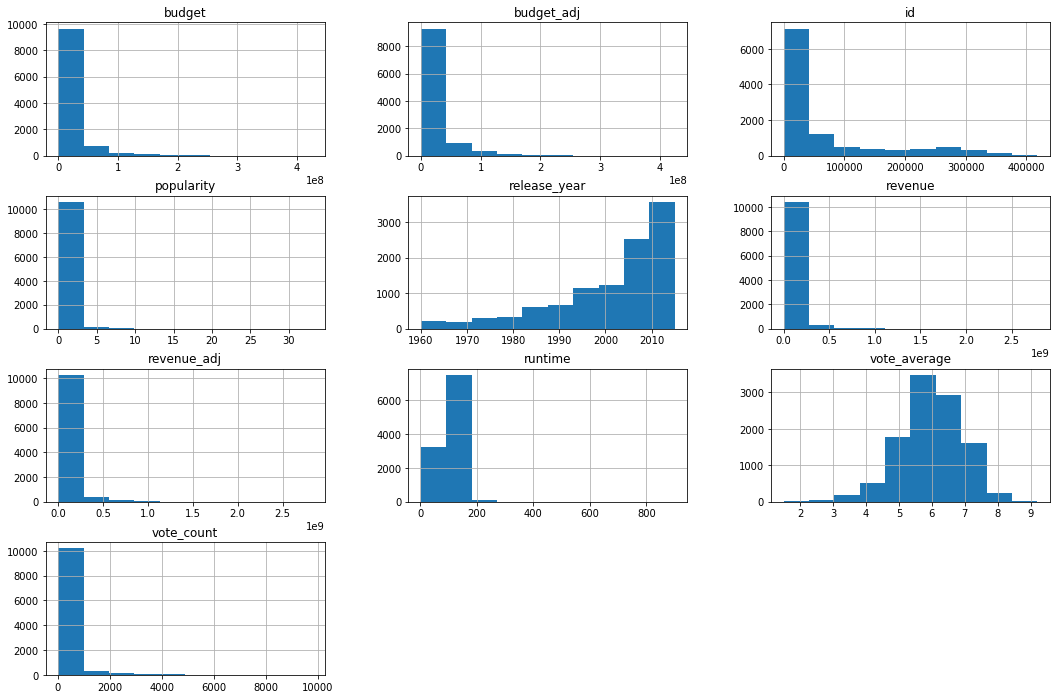

In [35]:
# Check distributions of columns
df.hist(figsize=(18,12));

Looking at the distributions of columns, most of them skew to the right. Like budget, revenue, vote_count. Only release_year and runtime skew to the left. Most of the movies were released after 1990. The only normally distributed attribute is vote_average, which reflects audiences' average review on all movies. This makes sense because movies with neutral rating should be the majority, much higher or lower rating movies should be less. 

### Research Question 2  (Which genres are most popular from year over year?)

In [96]:
# Firstly, get mean popularity of movies by year by genre
df_genre = df.groupby(['release_year','genres'],sort=True).popularity.mean().reset_index()
df_genre.head(10)

,release_year,genres,popularity
0,1960,Action|Adventure|Drama|History|Western,0.310398
1,1960,Action|Adventure|Western,1.872132
2,1960,Action|Drama|Foreign|History|War,0.194948
3,1960,Action|Drama|History,1.136943
4,1960,Action|Drama|History|War,0.256779
5,1960,Action|Drama|Romance|Western,0.266435
6,1960,Action|Drama|Western,0.421043
7,1960,Action|Western,0.267118
8,1960,Adventure|Family,0.465879
9,1960,Adventure|Fantasy|Science Fiction,0.144106


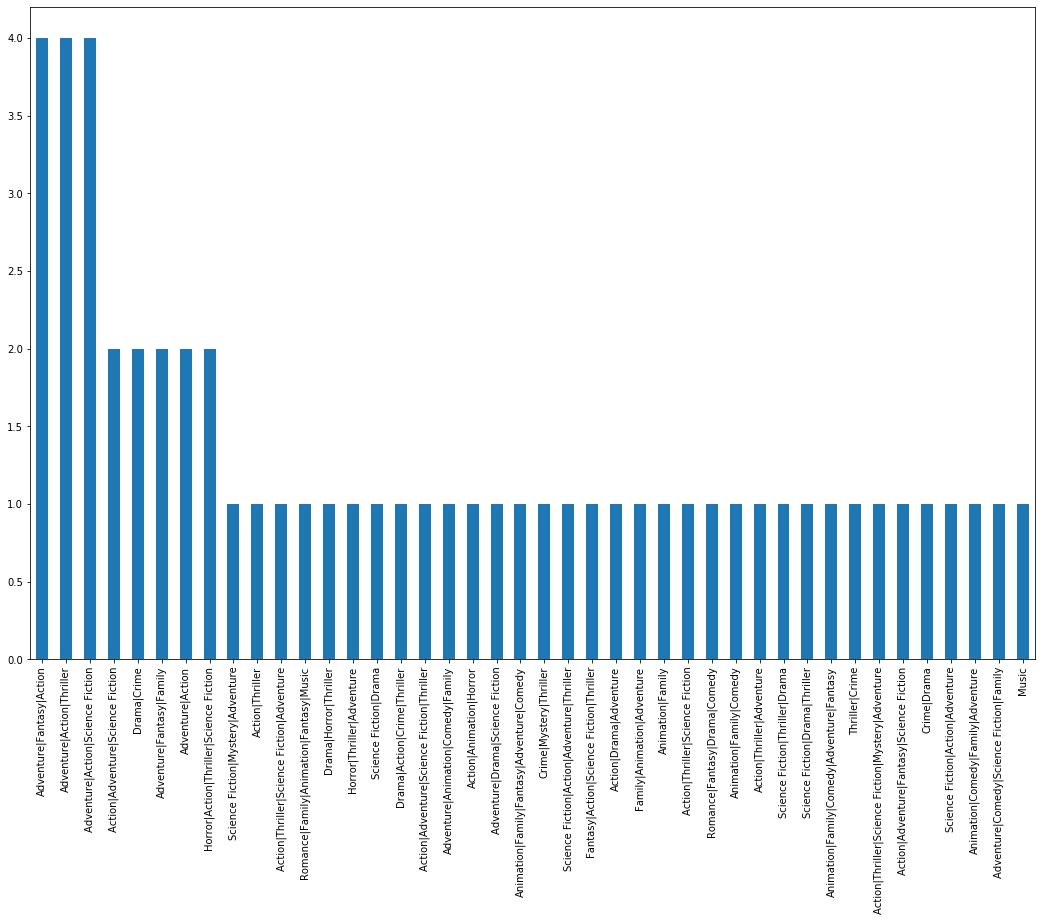

In [102]:
# Select the most popular, i.e. the genre of highest popularity by year. Then plot the count by most popular genres across years
df_popular_genre = df_genre.loc[df_genre.groupby('release_year')['popularity'].idxmax()]
df_popular_genre.genres.value_counts().plot(kind='bar',figsize=(18,12));

According to the genre popularity analysis above, the top 3 popular genres year over year includes:  
**Adventure|Fantasy|Action  
Adventure|Action|Thriller  
Adventure|Action|Science Fiction**

### Research Question 3  (Which properties are associated with movies with high revenue?)

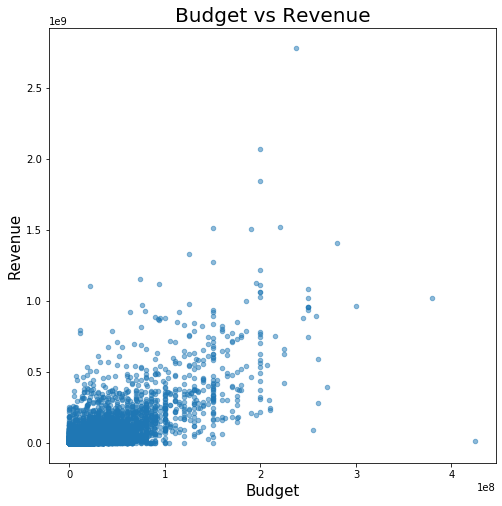

In [124]:
# Investigate the correlations between key characteristics with revenue
# Firstly, scatterplot between revenue and budget
df.plot(kind='scatter',x='budget',y='revenue',figsize=(8,8),alpha=0.5)
plt.title('Budget vs Revenue',fontsize = 20)
plt.xlabel('Budget', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15);

According to the graph above showing correlations between Revenue and Budget, there is a positive correlation between them. That makes sense because for movies with higher budget, there is a bigger chance that those movies will get higher revenue. 

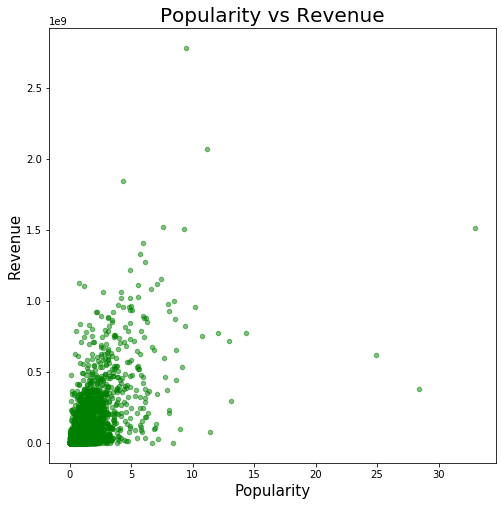

In [129]:
# Check the correlation between popularity and revenue
df.plot(kind='scatter',x='popularity',y='revenue',figsize=(8,8),alpha=0.5, color='green')
plt.title('Popularity vs Revenue',fontsize = 20)
plt.xlabel('Popularity', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15);

The graph above shows correlations between Revenue and Popularity, there's a positive correlation between them. It's reasonable that more popular movies have higher revenue since people tend to go to theaters to view them. 

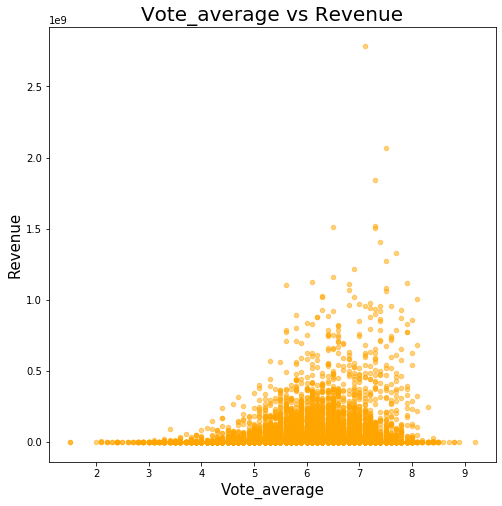

In [130]:
# Check the correlation between vote_average and revenue
df.plot(kind='scatter',x='vote_average',y='revenue',figsize=(8,8),alpha=0.5, color='orange')
plt.title('Vote_average vs Revenue',fontsize = 20)
plt.xlabel('Vote_average', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15);

The graph above shows the relationship between Vote_average and Revenue. Unlike what I assume, it's not a very obvious positive correlation. But it's close to a positive correlation. Looks like some movies with medium vote_average have higher Revenue.

<a id='conclusions'></a>
## Conclusions

> **Firstly**, looking at the distributions of columns, most of them skew to the right. Like budget, revenue, vote_count. Only release_year and runtime skew to the left. Most of the movies were released after 1990. The only normally distributed attribute is vote_average, which reflects audiences' average review on all movies. This makes sense because movies with neutral rating should be the majority, much higher or lower rating movies should be less. 

> **Sencondly**, the top 3 popular genres year over year includes:  Adventure|Fantasy|Action, Adventure|Action|Thriller, Adventure|Action|Science Fiction

> **Thirdly**, I've investigated three variables' relationship with revenue. Both popularity and budget have clear positive correlations with revenue. Vote_average has a vague relationship to revenue. 

There are more characteristics that can be analyzed in the future. 